> # Regularization #

DNN has 10 thousand, sometimes millions parameters. So it is easy to occur overfitting problem. So we need some regularization.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

### 1. $l_1$ and $l_2$ Norm ###

Like in linear regression, we can use $l_1$ norm to make sparse model or $l_2$ norm to limit weights of neural network. Under code shows how to apply 0.001 $l_2$ regularization.

In [3]:
layer = keras.layers.Dense(100, activation="elu", 
                           kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.001))

We can use **kears.regularizers.l1()** to use $l_1$ penalty. If we want both $l_1$ and $l_2$, use **keras.regularizers.l1_l2()**. We usually repeat same vairable sincce we use same initialization or apply same regularization to all layers. But this make code difficult to read and bug is easy to occur. So we use refactoring or functool of python.

In [4]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense, activation="elu",
                           kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer="glorot_uniform")
])

### 2. Drop Out ###

Drop out is one of most popular regualization methods. Each neuron has probability $p$ of temporary drop out. A neuron can be ignored in this step, but it can be activated in next step. Hyperparameter $p$ is dropout rate and it is set between 10% and 50%. After train, drop out isn't appied anymore.

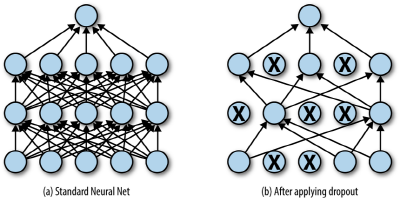

It can be thought as generating a inherent network. Since each neuron can either appear or disapper, $2^N$ networks is available. So if we progress 10,000 train steps, we train 10,000 different neural network. Although these networks share most weights, they are all different. So we can see this made network as ensembled all networks.

If $p=50$%, a neuron is connected with 2 times more input neurons dring test. To compensate it, we have to multiply 0.5 at each weight of neurons after train. In generally, we have to multiply keep probability $(1-p)$ at each weight.

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

If the model is overfitted, we can increase dropout rate. On the contrary, we have to lower dropout rate if the model is underfitted. Dropout tends to slow convergence but it makes much better model.

### 3. Max-Norm regularization ###

Max-Norm regularization limits weight $\mathbf{w}$ of each neuron to $|\mathbf{w}|_2 \leq r$. $r$ is max-norm hyperparameter. Instead after each train step, caculate $|\mathbf{w}|_2$ after train step and tune scale of $\mathbf{w}$ if it is needed. Decrease $r$ helps to prevent overfitting.

In [6]:
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                  kernel_constraint=keras.constraints.max_norm(1.))

After each train step, **fit** method of model calls class **max_norm** returned and get scaled weights. And change weights of layer using these value.